# Striplog from CSV

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import striplog
striplog.__version__

'0.7.3'

In [2]:
from striplog import Lexicon, Decor, Component, Legend, Interval, Striplog

## Make legend

Most of the stuff in the dicts you made were about **display** — so they are going to make `Decor` objects. A collection of `Decor`s makes a `Legend`. A `Legend` determines how a striplog is displayed.

First I'll make the components, since those are easy. I'll move `'train'` into there too, since it is to do with the rocks, not the display. If it seems weird having `'train'` in the `Component` (which is really supposed to be about direct descriptions of the rock, but the idea is that it's always the same for all specimens of that rock so it does fit here) then you could put it in `data` instead. 

In [3]:
# define your abbreviations here, this is what the CSV will read in

facies = {
    's': Component({'lithology': 'sandstone', 'train':'y'}),
    'os': Component({'lithology': 'oilstained', 'train':'y'}),
    'is': Component({'lithology': 'clay_prone_sandstone', 'train':'y'}),
    'ih': Component({'lithology': 'sandy_mudstone', 'train':'y'}),
    'sh': Component({'lithology': 'mudstone', 'train':'y'}),
    'bs': Component({'lithology': 'sandstone', 'train': 'n'}),
    't': Component({'lithology': 'turbidite', 'train':'y'}),
    'nc': Component({'lithology': 'none', 'train':'n'}),
}

In [4]:
facies

{'s': Component({'lithology': 'sandstone', 'train': 'y'}),
 'os': Component({'lithology': 'oilstained', 'train': 'y'}),
 'is': Component({'lithology': 'clay_prone_sandstone', 'train': 'y'}),
 'ih': Component({'lithology': 'sandy_mudstone', 'train': 'y'}),
 'sh': Component({'lithology': 'mudstone', 'train': 'y'}),
 'bs': Component({'lithology': 'sandstone', 'train': 'n'}),
 't': Component({'lithology': 'turbidite', 'train': 'y'}),
 'nc': Component({'lithology': 'none', 'train': 'n'})}

In [7]:
# pick how your facies will look in the log, see striplog for specfics

sandstone = Decor({
    'component': facies['s'],
    'colour': 'yellow',
    'hatch': '.',
    'width': '4',
})

oilstained = Decor({
    'component': facies['os'],
    'colour': 'brown',
    'hatch': '/',
    'width': '3',
})

clay_prone_sandstone = Decor({
    'component': facies['is'],
    'colour': 'greenyellow',
    'hatch': '--',
    'width': '3',
})


sandy_mudstone = Decor({
    'component': facies['ih'],
    'colour': 'darkseagreen',
    'hatch': '---',
    'width': '2',
})

mudstone = Decor({
    'component': facies['sh'],
    'colour': 'darkgray',
    'hatch': '-',
    'width': '1',
})

# Not sure about the best way to do this, probably better
# just to omit those intervals completely.

badsand = Decor({
    'component': facies['bs'],
    'colour': 'orange',
    'hatch': '.',
    'width': '4',
})

nocore = Decor({
    'component': facies['nc'],
    'colour': 'white',
    'hatch': '/',
    'width': '5',
})

turbidite = Decor({
    'component': facies['t'],
    'colour': 'green',
    'hatch': 'xxx',
    'width': '3',
})

In [8]:
legend = Legend([sandstone, oilstained, badsand, clay_prone_sandstone, sandy_mudstone, mudstone, turbidite, nocore])

In [9]:
legend

Legend(Decor({'component': Component({'lithology': 'sandstone', 'train': 'y'}), '_colour': '#ffff00', 'hatch': '.', 'width': 4.0})
Decor({'component': Component({'lithology': 'oilstained', 'train': 'y'}), '_colour': '#a52a2a', 'hatch': '/', 'width': 3.0})
Decor({'component': Component({'lithology': 'sandstone', 'train': 'n'}), '_colour': '#ffa500', 'hatch': '.', 'width': 4.0})
Decor({'component': Component({'lithology': 'clay_prone_sandstone', 'train': 'y'}), '_colour': '#adff2f', 'hatch': '--', 'width': 3.0})
Decor({'component': Component({'lithology': 'sandy_mudstone', 'train': 'y'}), '_colour': '#8fbc8f', 'hatch': '---', 'width': 2.0})
Decor({'component': Component({'lithology': 'mudstone', 'train': 'y'}), '_colour': '#a9a9a9', 'hatch': '-', 'width': 1.0})
Decor({'component': Component({'lithology': 'turbidite', 'train': 'y'}), '_colour': '#008000', 'hatch': 'xxx', 'width': 3.0})
Decor({'component': Component({'lithology': 'none', 'train': 'n'}), '_colour': '#ffffff', 'hatch': '/', 'width': 5.0}))

## Read CSV into striplog

In [17]:
strip = Striplog.from_csv('test2.csv') # literally reading in the CSV file

In [18]:
strip[0] # quick test

Interval({'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}), 'base': Position({'middle': 20.0, 'units': 'm'}), 'description': '', 'data': {'lithology': 's'}, 'components': []})

## Deal with lithology

The lithology has been turned into a component, but it's using the abbreviation... I can't figure out an elegant way to deal with this so, for now, we'll just loop over the striplog and fix it. We read the `data` item's lithology (`'s'` in the top layer), then look up the correct lithology name in our abbreviation dictionary, then add the new component in the proper place. Finally, we delete the `data` we had.

In [19]:
s.data

{}

In [20]:
for s in strip:
    lith = s.data['lithology']
    s.components = [facies[lith]]
    s.data = {}

In [21]:
strip[0]

Interval({'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}), 'base': Position({'middle': 20.0, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'train': 'y'})]})

That's better!

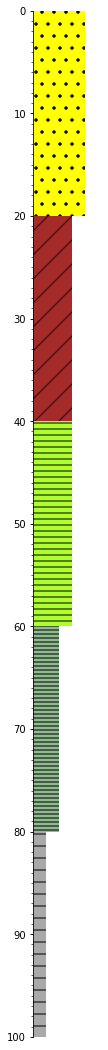

In [22]:
strip.plot(legend)


## Remove non-training layers

In [ ]:
strip

In [ ]:
strip_train = Striplog([s for s in strip if s.primary['train'] == 'y'])

In [ ]:
strip_train

strip_train.plot(legend)

In [ ]:
# plottin' & exportin'

fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(7, 11) # Set the figure size

ax0 = strip.plot(legend, ax=ax0)
ax1 = strip_train.plot(legend, ax=ax1)

ax0.set_title('Picks')
ax1.set_title('Training')

ax0.set_ylabel('Depth (m)', size=16)

plt.show()
fig.savefig('Picks_v_training.pdf', dpi=300)

In [ ]:
print(strip.to_csv())